# Final project: World Happiness

Maaike de Jong  
June 2020

Ironhack Amsterdam  
Data Analytics part-time

In [79]:
# import packages

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely import wkt

In [5]:
# import main data file

df = pd.read_csv('dfML.csv')
df.head()

,Country,Region,Score mean,Access to electricity (% of population),CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of origin,"Population, total",Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,Switzerland,Western Europe,7.5114,100.0,4.732688,82645.581204,86.791615,3.951600e+04,83.026287,11.656622,...,1.052495,6.0,30.800,15.000000,8.181440e+06,22.946425,7.0,9.660123,73.697333,0.000002
1,Iceland,Western Europe,7.5110,100.0,5.921191,55453.949873,96.981917,1.002500e+05,82.454472,7.178653,...,1.133978,7.0,41.440,2.833333,3.301440e+05,76.467214,7.0,17.914355,93.675778,0.000009
2,Denmark,Western Europe,7.5460,100.0,7.003336,58721.482142,94.347397,4.208778e+04,80.440108,11.047112,...,0.531352,6.9,38.311,7.750000,5.659816e+06,27.220085,6.0,17.921347,87.377222,0.000001
3,Norway,Western Europe,7.5410,100.0,10.416053,87977.602660,95.537903,3.651633e+05,81.969919,7.697953,...,1.059666,7.0,39.903,10.000000,5.121086e+06,57.320681,6.0,17.060995,80.678222,0.000002
4,Canada,North America,7.3506,100.0,15.234180,48056.677329,86.422500,9.093510e+06,81.732249,7.558178,...,1.078803,6.0,25.365,93.222222,3.544359e+07,22.181059,6.0,9.687049,81.209556,0.000003


In [7]:
# rename some of the columns (see previous notebook)

df2 = df.rename(columns = {'Score mean': 'Happiness score',
                            'CO2 emissions (metric tons per capita)': 'CO2 emission per capita',
                            'GDP per capita (current US$)': 'GDP per capita',
                            'Individuals using the Internet (% of population)': 'Access to electricity %',
                            'Land area (sq. km)': 'Land area',
                            'Life expectancy at birth, total (years)': 'Life expectancy',
                            'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)': 'Air pollution',
                            'People using at least basic drinking water services (% of population)': 'Drinking water services',
                            'Population density (people per sq. km of land area)': 'Population density',
                            'Population growth (annual %)': 'Population growth',
                            'Primary education, duration (years)': 'Primary education years',
                            'Proportion of seats held by women in national parliaments (%)': 'Women in parliament %',
                            'Renewable energy consumption (% of total final energy consumption)': 'Renewable energy %',
                            'Secondary education, duration (years)': 'Secondary education years',
                            'Terrestrial protected areas (% of total land area)': 'Protected land %',
                            'Urban population (% of total population)': 'Urban population',
                            'Refugees country of origin (% of total population': 'Refugees %'})

df2.head()

,Country,Region,Happiness score,Access to electricity (% of population),CO2 emission per capita,GDP per capita,Access to electricity %,Land area,Life expectancy,Air pollution,...,Population growth,Primary education years,Women in parliament %,Refugee population by country or territory of origin,"Population, total",Renewable energy %,Secondary education years,Protected land %,Urban population,Refugees %
0,Switzerland,Western Europe,7.5114,100.0,4.732688,82645.581204,86.791615,3.951600e+04,83.026287,11.656622,...,1.052495,6.0,30.800,15.000000,8.181440e+06,22.946425,7.0,9.660123,73.697333,0.000002
1,Iceland,Western Europe,7.5110,100.0,5.921191,55453.949873,96.981917,1.002500e+05,82.454472,7.178653,...,1.133978,7.0,41.440,2.833333,3.301440e+05,76.467214,7.0,17.914355,93.675778,0.000009
2,Denmark,Western Europe,7.5460,100.0,7.003336,58721.482142,94.347397,4.208778e+04,80.440108,11.047112,...,0.531352,6.9,38.311,7.750000,5.659816e+06,27.220085,6.0,17.921347,87.377222,0.000001
3,Norway,Western Europe,7.5410,100.0,10.416053,87977.602660,95.537903,3.651633e+05,81.969919,7.697953,...,1.059666,7.0,39.903,10.000000,5.121086e+06,57.320681,6.0,17.060995,80.678222,0.000002
4,Canada,North America,7.3506,100.0,15.234180,48056.677329,86.422500,9.093510e+06,81.732249,7.558178,...,1.078803,6.0,25.365,93.222222,3.544359e+07,22.181059,6.0,9.687049,81.209556,0.000003


In [ ]:
# Add columns with log versions of some variables for plotting



In [8]:
df2['CO2 emission per capita (log)'] = np.log10(df2['CO2 emission per capita'])
df2['GDP per capita (log)'] = np.log10(df2['GDP per capita'])
df2['Land area (log)'] = np.log10(df2['Land area'])
df2['Air pollution (log)'] = np.log10(df2['Air pollution'])
df2['Population density (log)'] = np.log10(df2['Population density'])
df2['Refugees % (log)'] = np.log10(df2['Refugees %'])

In [9]:
df2.head()

,Country,Region,Happiness score,Access to electricity (% of population),CO2 emission per capita,GDP per capita,Access to electricity %,Land area,Life expectancy,Air pollution,...,Secondary education years,Protected land %,Urban population,Refugees %,CO2 emission per capita (log),GDP per capita (log),Land area (log),Air pollution (log),Population density (log),Refugees % (log)
0,Switzerland,Western Europe,7.5114,100.0,4.732688,82645.581204,86.791615,3.951600e+04,83.026287,11.656622,...,7.0,9.660123,73.697333,0.000002,0.675108,4.917220,4.596773,1.066573,2.316057,-5.736739
1,Iceland,Western Europe,7.5110,100.0,5.921191,55453.949873,96.981917,1.002500e+05,82.454472,7.178653,...,7.0,17.914355,93.675778,0.000009,0.772409,4.743932,5.001084,0.856043,0.517619,-5.066406
2,Denmark,Western Europe,7.5460,100.0,7.003336,58721.482142,94.347397,4.208778e+04,80.440108,11.047112,...,6.0,17.921347,87.377222,0.000001,0.845305,4.768797,4.624156,1.043249,2.128672,-5.863501
3,Norway,Western Europe,7.5410,100.0,10.416053,87977.602660,95.537903,3.651633e+05,81.969919,7.697953,...,6.0,17.060995,80.678222,0.000002,1.017703,4.944372,5.562487,0.886375,1.146877,-5.709362
4,Canada,North America,7.3506,100.0,15.234180,48056.677329,86.422500,9.093510e+06,81.732249,7.558178,...,6.0,9.687049,81.209556,0.000003,1.182819,4.681754,6.958732,0.878417,0.590806,-5.580018


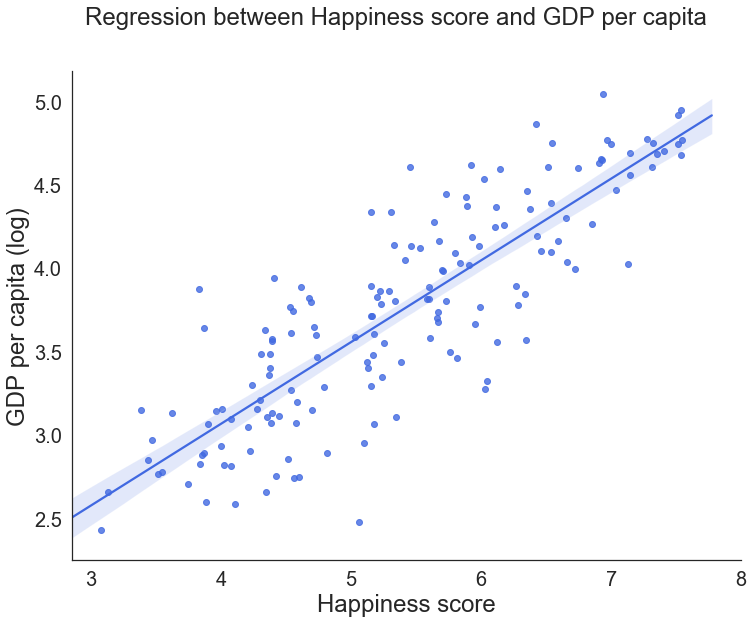

In [35]:
# Make few more figures to show the correlation between happiness score and top three variables
# Top three variables are: GDP, life expectancy and refugees

sns.set()
sns.set_style('white')
sns.set_color_codes('pastel')

f, ax = plt.subplots(figsize=(12, 9))

sns.regplot(x = 'Happiness score', y = 'GDP per capita (log)', color = 'royalblue', data = df2)

ax.tick_params(axis='both', which='major', labelsize=20) 
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.set_xticks(range(3, 9, 1))
#ax.set_yticks(range(0, 7, 1))

# ax.legend(loc="lower right", frameon=True, fontsize = 20)

plt.xlabel('Happiness score', fontsize=24)
plt.ylabel('GDP per capita (log)', fontsize=24)
plt.suptitle('Regression between Happiness score and GDP per capita', fontsize=24)

sns.despine()

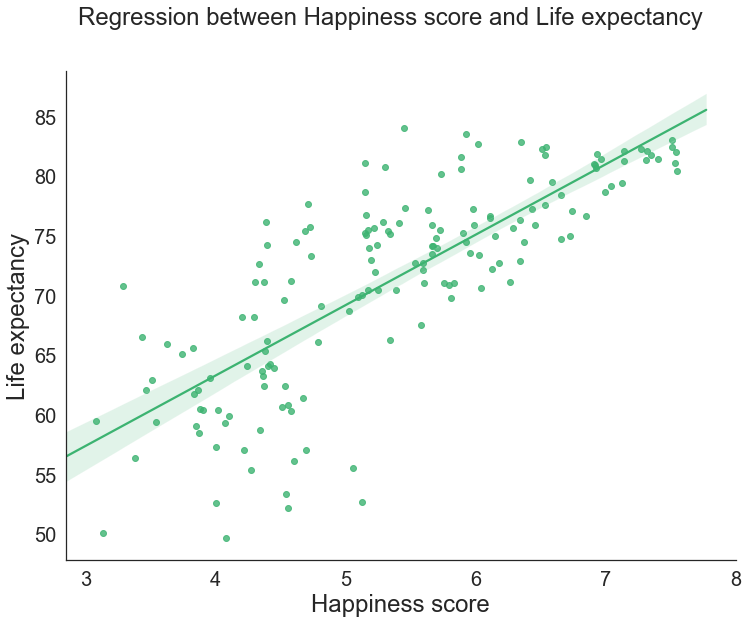

In [36]:
sns.set()
sns.set_style('white')
sns.set_color_codes('pastel')

f, ax = plt.subplots(figsize=(12, 9))

sns.regplot(x = 'Happiness score', y = 'Life expectancy', color = 'mediumseagreen', data = df2)

ax.tick_params(axis='both', which='major', labelsize=20) 
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.set_xticks(range(3, 9, 1))
#ax.set_yticks(range(0, 7, 1))

# ax.legend(loc="lower right", frameon=True, fontsize = 20)

plt.xlabel('Happiness score', fontsize=24)
plt.ylabel('Life expectancy', fontsize=24)
plt.suptitle('Regression between Happiness score and Life expectancy', fontsize=24)

sns.despine()

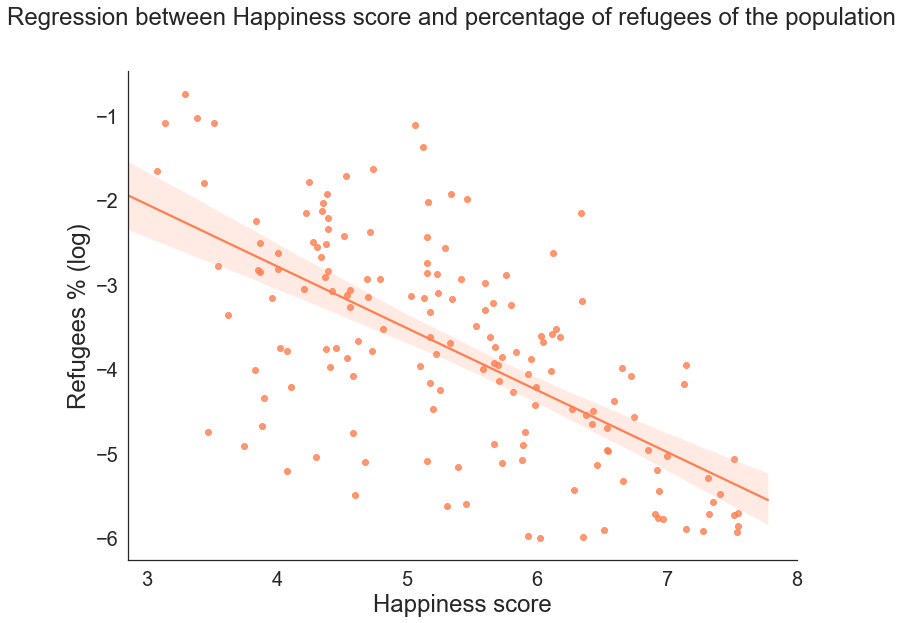

In [37]:
sns.set()
sns.set_style('white')
sns.set_color_codes('pastel')

f, ax = plt.subplots(figsize=(12, 9))

sns.regplot(x = 'Happiness score', y = 'Refugees % (log)', color = 'coral', data = df2)

ax.tick_params(axis='both', which='major', labelsize=20) 
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.set_xticks(range(3, 9, 1))
#ax.set_yticks(range(0, 7, 1))

# ax.legend(loc="lower right", frameon=True, fontsize = 20)

plt.xlabel('Happiness score', fontsize=24)
plt.ylabel('Refugees % (log)', fontsize=24)
plt.suptitle('Regression between Happiness score and percentage of refugees of the population', fontsize=24)

sns.despine()

In [48]:
# import world map geodataframe. The lowres worldmap dataset from Natural Earth can be imported directly from geopandas

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns = {'name': 'Country'}, inplace = True)
world.head()

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [62]:
world.shape

(177, 6)

In [63]:
df2.shape

(161, 28)

In [59]:
# Will merge this with main df on country. First check whether country names are the samelist15 = hap15_s1['Country'].values.tolist()
list1 = df2['Country'].values.tolist()

list2 = world['Country'].values.tolist()

In [60]:
sorted(list(set(list1) - set(list2)))

['Bahrain',
 'Bosnia and Herzegovina',
 'Central African Republic',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Czech Republic',
 'Dominican Republic',
 'Hong Kong',
 'Ivory Coast',
 'Malta',
 'Mauritius',
 'Palestinian Territories',
 'Singapore',
 'South Sudan',
 'Swaziland',
 'United States']

In [61]:
sorted(list(set(list2) - set(list1)))

['Antarctica',
 'Bahamas',
 'Bosnia and Herz.',
 'Brunei',
 'Central African Rep.',
 'Congo',
 'Cuba',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Dominican Rep.',
 'Eq. Guinea',
 'Eritrea',
 'Falkland Is.',
 'Fiji',
 'Fr. S. Antarctic Lands',
 'Greenland',
 'Guinea-Bissau',
 'Guyana',
 'N. Cyprus',
 'New Caledonia',
 'North Korea',
 'Palestine',
 'Papua New Guinea',
 'S. Sudan',
 'Solomon Is.',
 'Somaliland',
 'Taiwan',
 'Timor-Leste',
 'United States of America',
 'Vanuatu',
 'W. Sahara',
 'eSwatini']

In [64]:
# replace names

world2 = world.replace({'Country': {'Bosnia and Herz.': 'Bosnia and Herzegovina', 'Central African Rep.': 'Central African Republic', 'Congo': 'Congo (Brazzaville)', 'Dem. Rep. Congo': 'Congo (Kinshasa)', 'Czechia': 'Czech Republic', 'Dominican Rep.': 'Dominican Republic', "Côte d'Ivoire": 'Ivory Coast', 'Palestine': 'Palestinian Territories', 'S. Sudan': 'South Sudan', 'eSwatini': 'Swaziland', 'United States of America': 'United States'}})


In [67]:
# create new world df without Antarctica: 

world3 = world2[world2['Country'] != 'Antarctica']

In [69]:
# join this df with the main df

dfgeo = pd.merge(world3, df2, on = 'Country', how = 'left')

In [70]:
gdf = gpd.GeoDataFrame(dfgeo, geometry = 'geometry')
gdf.head()

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry,Region,Happiness score,Access to electricity (% of population),CO2 emission per capita,...,Secondary education years,Protected land %,Urban population,Refugees %,CO2 emission per capita (log),GDP per capita (log),Land area (log),Air pollution (log),Population density (log),Refugees % (log)
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Sub-Saharan Africa,3.4660,23.535458,0.200455,...,6.0,38.137051,30.920444,0.000018,-0.697983,2.968663,5.947336,1.461086,1.752627,-4.745399
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",North America,7.3506,100.000000,15.234180,...,6.0,9.687049,81.209556,0.000003,1.182819,4.681754,6.958732,0.878417,0.590806,-5.580018
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",North America,6.9988,100.000000,16.713619,...,6.0,12.985915,81.496000,0.000009,1.223071,4.740998,6.961299,0.929021,1.541470,-5.029266


In [71]:
type(gdf['geometry'])

geopandas.geoseries.GeoSeries

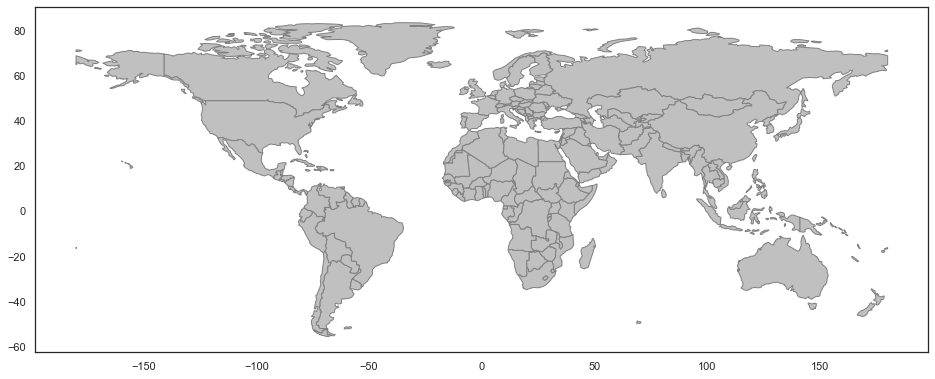

In [74]:
# Create choropleth maps of happiness score and other variables per country

# first check whether the country map data is complete
plt.rcParams['figure.figsize'] = [16,8]
gdf.plot(facecolor = 'silver', edgecolor = 'grey');

In [76]:
# Fill happiness score NaNs with zeroes
gdf['Happiness score'] = gdf['Happiness score'].fillna(value = 0)

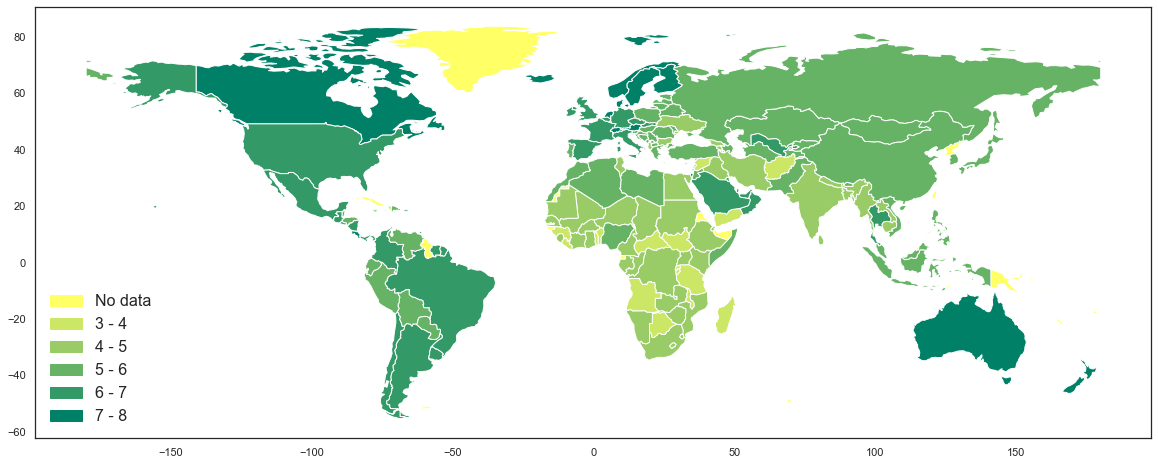

In [114]:
# plot the map with happiness scores

plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1, 1)

gdf.plot(column='Happiness score', legend=True, ax = ax, cmap='summer_r', scheme='user_defined', classification_kwds = {'bins':[3, 4, 5, 6, 7, 8]})

cmap = cm.get_cmap('summer_r')
patch1 = mpatches.Patch(color=cmap(0.0), label = 'No data')
patch2 = mpatches.Patch(color=cmap(0.2), label = '3 - 4')
patch3 = mpatches.Patch(color=cmap(0.4), label = '4 - 5')
patch4 = mpatches.Patch(color=cmap(0.6), label = '5 - 6')
patch5 = mpatches.Patch(color=cmap(0.8), label = '6 - 7')
patch6 = mpatches.Patch(color=cmap(1.0), label = '7 - 8')

plt.legend(handles = [patch1, patch2, patch3, patch4, patch5, patch6], prop = {'size':16}, loc = 'lower left', frameon = False)

plt.show()


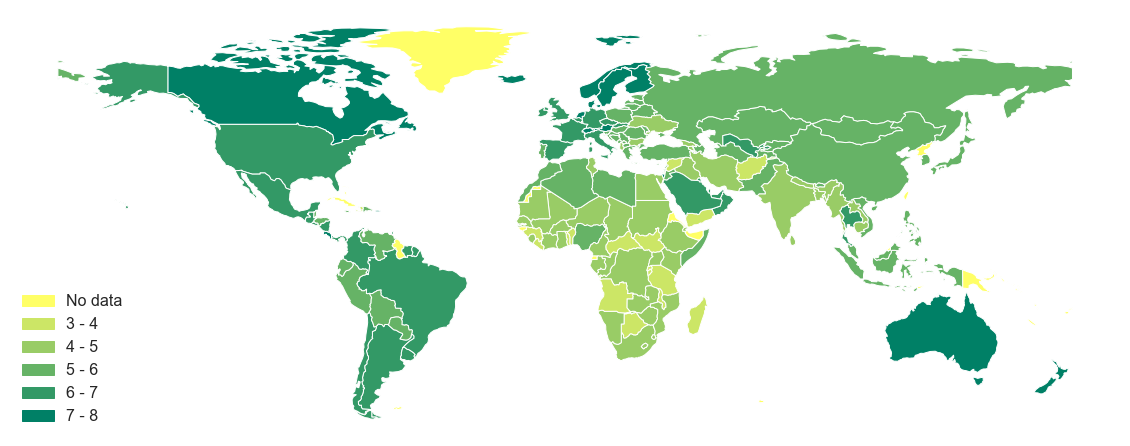

In [116]:
ax.set_axis_off()
ax.get_figure()

In [105]:
# investigate GDP per capita

gdf['GDP per capita'].describe()


count       176.000000
mean      12052.217248
std       19001.738996
min           0.000000
25%         887.529818
50%        3901.342719
75%       13314.997403
max      109948.677645
Name: GDP per capita, dtype: float64

In [103]:
# Fill GDP NaNs with zeroes
gdf['GDP per capita'] = gdf['GDP per capita'].fillna(value = 0)

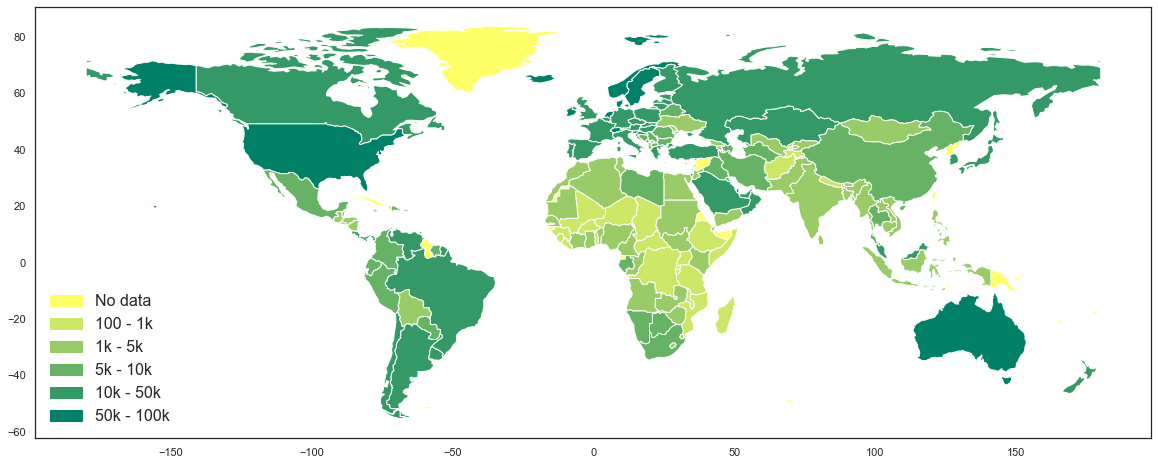

In [117]:
# plot map with GDP

plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1, 1)

gdf.plot(column='GDP per capita', legend=True, ax = ax, cmap='summer_r', scheme='user_defined', classification_kwds = {'bins':[100, 1000, 5000, 10000, 50000, 200000]})

cmap = cm.get_cmap('summer_r')
patch1 = mpatches.Patch(color=cmap(0.0), label = 'No data')
patch2 = mpatches.Patch(color=cmap(0.2), label = '100 - 1k')
patch3 = mpatches.Patch(color=cmap(0.4), label = '1k - 5k')
patch4 = mpatches.Patch(color=cmap(0.6), label = '5k - 10k')
patch5 = mpatches.Patch(color=cmap(0.8), label = '10k - 50k')
patch6 = mpatches.Patch(color=cmap(1.0), label = '50k - 100k')

plt.legend(handles = [patch1, patch2, patch3, patch4, patch5, patch6], prop = {'size':16}, loc = 'lower left', frameon = False)

plt.show()

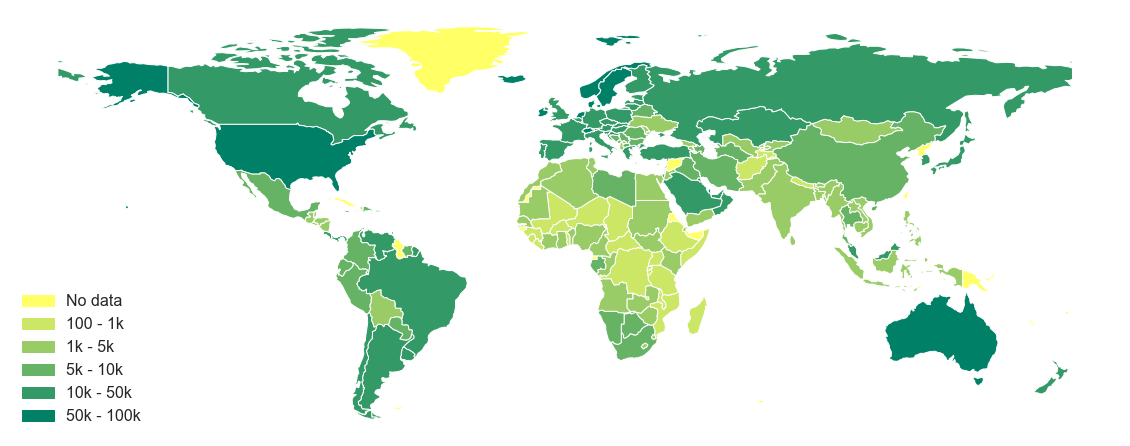

In [118]:
ax.set_axis_off()
ax.get_figure()